In [1]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with the Vertex AI PaLM API & Python SDK

> **NOTE:** This notebook uses the PaLM generative model, which will reach its [discontinuation date in October 2024](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/text#model_versions). Please refer to [this updated notebook](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_python.ipynb) for a version which uses the latest Gemini model.

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>


| | |
|-|-|
|Author(s) | [Polong Lin](https://github.com/polong-lin) |

## Overview

### What are LLMs?
Large language models (LLMs) are deep learning models trained on massive datasets of text. LLMs can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems.

### PaLM
Following its predecessor, [PaLM](https://ai.googleblog.com/2022/04/pathways-language-model-palm-scaling-to.html), [PaLM 2](https://ai.google/discover/palm2) is Google's next generation large language model that builds on Google's legacy of breakthrough research in machine learning and responsible AI. PaLM 2 excels at tasks like advanced reasoning, translation, and code generation because of how it was built.

PaLM 2 [excels](https://ai.google/static/documents/palm2techreport.pdf) at advanced reasoning tasks, including code and math, classification and question answering, translation and multilingual proficiency, and natural language generation better than our previous state-of-the-art LLMs, including PaLM. It can accomplish these tasks because of the way it was built – bringing together compute-optimal scaling, an improved dataset mixture, and model architecture improvements.

PaLM 2 is grounded in Google's approach to building and deploying AI responsibly. It was evaluated rigorously for its potential harms and biases, capabilities and downstream uses in research and in-product applications. It's being used in other state-of-the-art models, like Med-PaLM 2 and Sec-PaLM, and is powering generative AI features and tools at Google, like Bard and the PaLM API.

PaLM is pre-trained on a wide range of text data using an unsupervised learning approach, without any specific task. During this pre-training process, PaLM learns to predict the next word in a sentence, given the preceding words. This enables the model to generate coherent, fluent text resembling human writing.
This large size enables it to learn complex patterns and relationships in language and generate high-quality text for various applications. This is why models like PaLM are referred to as "foundational models."

Creating an LLM requires massive amounts of data, significant compute resources, and specialized skills. Because LLMs require a big investment to create, they target broad rather than specific use cases. On Vertex AI, you can customize a foundation model for more specific tasks or knowledge domains by using prompt design and model tuning.

### Vertex AI PaLM API
The Vertex AI PaLM API, [released on May 10, 2023](https://cloud.google.com/vertex-ai/docs/generative-ai/release-notes#may_10_2023), is powered by [PaLM 2](https://ai.google/discover/palm2).

### Using Vertex AI PaLM API

You can interact with the Vertex AI PaLM API using the following methods:

* Use the [Generative AI Studio](https://cloud.google.com/generative-ai-studio) for quick testing and command generation.
* Use cURL commands in Cloud Shell.
* Use the Python SDK in a Jupyter notebook

This notebook focuses on using the Python SDK to call the Vertex AI PaLM API. For more information on using Generative AI Studio without writing code, you can explore [Getting Started with the UI instructions](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_vertex_ai_studio.md)


For more information, check out the [documentation on generative AI support for Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

### Objectives

In this tutorial, you will learn how to use PaLM API with the Python SDK and explore its various parameters.

By the end of the notebook, you should be able to understand various nuances of generative model parameters like `temperature`, `top_k`, `top_p`, and how each parameter affects the results.

The steps performed include:

- Installing the Python SDK
- Using Vertex AI PaLM API
  - Text generation model with `text-bison`
    - Understanding model parameters (`temperature`, `max_output_token`,  `top_k`, `top_p`)
  - Chat model with `chat-bison`
  - Embeddings model with `textembedding-gecko`
  

### Costs
This tutorial uses billable components of Google Cloud:

* Vertex AI Generative AI Studio

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

### Data governance and security
For more information, see the documentation on [Data Governance and Generative AI](https://cloud.google.com/vertex-ai/docs/generative-ai/data-governance) on Google Cloud.

### Responsible AI
Large language models (LLMs) can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. At the same time, as an early-stage technology, its evolving capabilities and uses create potential for misapplication, misuse, and unintended or unforeseen consequences. Large language models can generate output that you don't expect, including text that's offensive, insensitive, or factually incorrect.

What's more, the incredible versatility of LLMs is also what makes it difficult to predict exactly what kinds of unintended or unforeseen outputs they might produce. Given these risks and complexities, the PaLM API is designed with [Google's AI Principles](https://ai.google/principles/) in mind. However, it is important for developers to understand and test their models to deploy safely and responsibly. To aid developers, the Generative AI Studio has built-in content filtering, and the PaLM API has safety attribute scoring to help customers test Google's safety filters and define confidence thresholds that are right for their use case and business. Please refer to the [Safety filters and attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) section to learn more.

When the PaLM API is integrated into a customer's unique use case and context, additional responsible AI considerations and [PaLM limitations](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#palm_limitations) may need to be considered. We encourage customers to leverage fairness, interpretability, privacy and security [recommended practices](https://ai.google/responsibilities/responsible-ai-practices/).

## Getting Started

### Install Vertex AI SDK

In [2]:
!pip install google-cloud-aiplatform==1.36.2 --upgrade --user

  Using cached google_cloud_aiplatform-1.36.2-py2.py3-none-any.whl.metadata (27 kB)
Using cached google_cloud_aiplatform-1.36.2-py2.py3-none-any.whl (3.1 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vertexai 1.65.0 requires google-cloud-aiplatform[all]==1.65.0, but you have google-cloud-aiplatform 1.36.2 which is incompatible.


**Colab only:** Run the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top.

In [3]:
# Automatically restart kernel after installs so that your environment can access the new packages
'''
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)
'''

'\nimport IPython\n\napp = IPython.Application.instance()\napp.kernel.do_shutdown(True)\n'

### Authenticating your notebook environment

- If you are using **Colab** to run this notebook, run the cell below and continue.
- If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [4]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

- If you are running this notebook in a local development environment:
  - Install the [Google Cloud SDK](https://cloud.google.com/sdk).
  - Obtain authentication credentials. Create local credentials by running the following command and following the oauth2 flow (read more about the command [here](https://cloud.google.com/sdk/gcloud/reference/beta/auth/application-default/login)):

    ```bash
    gcloud auth application-default login
    ```

## Vertex AI PaLM API models

The Vertex AI PaLM API enables you to test, customize, and deploy instances of Google's large language models (LLM) called as PaLM,  so that you can leverage the capabilities of PaLM in your applications.

### Model naming scheme
Foundation model names have three components: use case, model size, and version number. The naming convention is in the format:  
`<use case>-<model size>@<version number>`

For example, `text-bison` represents the Bison text model.

The model sizes are as follows:
- **Bison**: The best value in terms of capability and cost.
- **Gecko**: The smallest and cheapest model for simple tasks.

### Available models

The Vertex AI PaLM API currently supports five models:

*   `text-bison` : Fine-tuned to follow natural language instructions and is suitable for a variety of language tasks.
*   `chat-bison` : Fine-tuned for multi-turn conversation use cases like building a chatbot.
*   `textembedding-gecko` : Returns model embeddings for text inputs.

* `code-bison`: A model fine-tuned to generate code based on a natural language description of the desired code. For example, it can generate a unit test for a function.

* `code-gecko`: A model fine-tuned to suggest code completion based on the context in code that's written.

* `codechat-bison`: A model fine-tuned for chatbot conversations that help with code-related questions.

You can find more information about the properties of these [foundational models in the Generative AI Studio documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models).


### Import libraries

**Colab only:** Run the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.

In [5]:
!pip install vertexai

  Using cached google_cloud_aiplatform-1.65.0-py2.py3-none-any.whl.metadata (31 kB)
Using cached google_cloud_aiplatform-1.65.0-py2.py3-none-any.whl (5.2 MB)
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.36.2
    Uninstalling google-cloud-aiplatform-1.36.2:
      Successfully uninstalled google-cloud-aiplatform-1.36.2


In [6]:
import vertexai

PROJECT_ID = "qwiklabs-gcp-02-d54e0c3091a8"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI SDK
vertexai.init(project=PROJECT_ID, location=REGION)

In [7]:
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity
from vertexai.language_models import (
    TextGenerationModel,
    TextEmbeddingModel,
    ChatModel,
    InputOutputTextPair,
    CodeGenerationModel,
    CodeChatModel,
)

## Text generation with `text-bison`

The text generation model from PaLM API that you will use in this notebook is `text-bison`.
It is fine-tuned to follow natural language instructions and is suitable for a variety of language tasks, such as:

- Classification
- Sentiment analysis
- Entity extraction
- Extractive question-answering
- Summarization
- Re-writing text in a different style
- Ad copy generation
- Concept ideation
- Concept simplification

#### Load model

In [8]:
generation_model = TextGenerationModel.from_pretrained("text-bison")

I0000 00:00:1725788345.802459   36712 config.cc:230] gRPC experiments enabled: call_status_override_on_cancellation, event_engine_dns, event_engine_listener, http2_stats_fix, monitoring_experiment, pick_first_new, trace_record_callops, work_serializer_clears_time_cache


#### Prompt design
Prompt design is the process of creating prompts that elicit the desired response from a language model. Prompt design is an important part of using language models because it allows non-specialists to control the output of the model with minimal overhead. By carefully crafting the prompts, you can nudge the model to generate a desired result. Prompt design can be an efficient way to experiment with adapting an LLM for a specific use case. The iterative process of repeatedly updating prompts and assessing the model's responses is sometimes called prompt engineering.

#### Hello PaLM

Create your first prompt and send it to the text generation model.

In [9]:
prompt = "What is a large language model?"

response = generation_model.predict(prompt=prompt)

print(response.text)

 A large language model (LLM) is a type of artificial intelligence (AI) that can understand and generate human language. LLMs are trained on massive datasets of text and code, and they learn to identify patterns and relationships in language. This allows them to generate text that is both coherent and informative.

LLMs are used in a variety of applications, including:

* **Natural language processing (NLP)**: LLMs can be used to perform a variety of NLP tasks, such as machine translation, text summarization, and question answering.
* **Chatbots**: LLMs can be used to create chatbots that can interact


#### Try out your own prompt

- What are the biggest challenges facing the healthcare industry?
- What are the latest developments in the automotive industry?
- What are the biggest opportunities in the retail industry?
- (Try your own prompts!)

In [10]:
prompt = """How to create AI Girlfriend?"""  # try your own prompt

response = generation_model.predict(prompt=prompt)

print(response.text)

 Creating an AI girlfriend involves a combination of programming, natural language processing, and machine learning techniques. Here's a general overview of the steps involved:

**1. Define the AI Girlfriend's Personality:**
   - Determine the personality traits, interests, and characteristics you want your AI girlfriend to have.

**2. Build the AI's Knowledge Base:**
   - Gather a large dataset of text, images, and audio that covers various topics, including general knowledge, conversations, emotions, and relationships.

**3. Train the AI Model:**
   - Use machine learning algorithms to train a language model that can understand


#### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings.

In [11]:
my_industry = "tech"  # try changing this to a different industry

response = generation_model.predict(
    prompt=f"""Create a numbered list of 10 items. Each item in the list should
    be a trend in the {my_industry} industry.

    Each trend should be less than 5 words."""
)

print(response.text)

 **10 Trends in the Tech Industry**

1. Artificial intelligence
2. Machine learning
3. Cloud computing
4. Internet of Things
5. 5G networks
6. Blockchain
7. Cybersecurity
8. Virtual reality
9. Augmented reality
10. Quantum computing


### Model parameters for `text-bison`

You can customize how the PaLM API behaves in response to your prompt by using the following parameters for `text-bison`:

 - `temperature`: higher means more "creative" responses
 - `max_output_tokens`: sets the max number of tokens in the output
 - `top_p`: higher means it will pull from more possible next tokens, based on cumulative probability
 - `top_k`: higher means it will sample from more possible next tokens

The section below covers each parameter and how to use them.

#### The `temperature` parameter (range: 0.0 - 1.0, default 0)

##### What is _temperature_?
The temperature is used for sampling during the response generation, which occurs when top_p and top_k are applied. Temperature controls the degree of randomness in token selection.

##### How does _temperature_ affect the response?
Lower temperatures are good for prompts that require a more deterministic and less open-ended response. In comparison, higher temperatures can lead to more "creative" or diverse results. A temperature of `0` is deterministic: the highest probability response is always selected. For most use cases, try starting with a temperature of `0.2`.

A higher temperature value will result in a more explorative output, with a higher likelihood of generating rare or unusual words or phrases. Conversely, a lower temperature value will result in a more conservative output, with a higher likelihood of generating common or expected words or phrases.

##### Example:

For example,

`temperature = 0.0`:

* _The cat sat on the couch, watching the birds outside._
* _The cat sat on the windowsill, basking in the sun._

`temperature = 0.9`:

* _The cat sat on the moon, meowing at the stars._
* _The cat sat on the cheeseburger, purring with delight._

**Note**: It's important to note that while the temperature parameter can help generate more diverse and interesting text, it can also increase the likelihood of generating nonsensical or inappropriate text (i.e. hallucinations). Therefore, it's important to use it carefully and with consideration for the desired outcome.

For more information on the `temperature` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

If you run the following cell multiple times, it should always return the same response, as `temperature=0` is deterministic.

In [12]:
temp_val = 0.0
prompt_temperature = "Complete the sentence: As I prepared the picture frame, I reached into my toolkit to fetch my:"

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 0.0]
 As I prepared the picture frame, I reached into my toolkit to fetch my hammer.


If you run the following cell multiple times, it may return different responses, as higher temperature values can lead to more diverse results, even though the prompt is the same as the above cell.

In [13]:
temp_val = 1.0

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 1.0]
 hammer.


#### The `max_output_tokens` parameter (range: 1 - 1024, default 128)

##### Tokens
A single token may be smaller than a word. For example, a token is approximately four characters. So 100 tokens correspond to roughly 60-80 words. It's essential to be aware of the token sizes as models have a limit on input and output tokens.

##### What is _max_output_tokens_?
`max_output_tokens` is the maximum number of tokens that can be generated in the response.

##### How does _max_output_tokens_ affect the response?

Specify a lower value for shorter responses and a higher value for longer responses. A token may be smaller than a word. A token is approximately four characters. 100 tokens correspond to roughly 60-80 words.

For more information on the `max_output_tokens` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [14]:
max_output_tokens_val = 5

response = generation_model.predict(
    prompt="List ten ways that generative AI can help improve the online shopping experience for users",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 5]
 1. **Personalized


In [15]:
max_output_tokens_val = 500

response = generation_model.predict(
    prompt="List ten ways that generative AI can help improve the online shopping experience for users",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 500]
 1. **Personalized Recommendations**: Generative AI can analyze user data and preferences to provide tailored product recommendations, enhancing the overall shopping experience and increasing the likelihood of conversions.

2. **Virtual Assistants**: AI-powered virtual assistants can assist users with their shopping queries, provide information about products, and guide them through the purchasing process, creating a more seamless and efficient experience.

3. **Image Generation**: Generative AI can generate high-quality images of products from different angles and in various settings, allowing users to visualize items more accurately and make informed decisions.

4. **Style Recommendations**: AI can analyze a user's style preferences and suggest complementary items, helping them build a cohesive and fashionable wardrobe or home décor.

5. **Product Descriptions**: Generative AI can create detailed and engaging product descriptions that highlight key features 

For easier reading, you can also render Markdown in Jupyter:

In [16]:
display(Markdown(response.text))

 1. **Personalized Recommendations**: Generative AI can analyze user data and preferences to provide tailored product recommendations, enhancing the overall shopping experience and increasing the likelihood of conversions.

2. **Virtual Assistants**: AI-powered virtual assistants can assist users with their shopping queries, provide information about products, and guide them through the purchasing process, creating a more seamless and efficient experience.

3. **Image Generation**: Generative AI can generate high-quality images of products from different angles and in various settings, allowing users to visualize items more accurately and make informed decisions.

4. **Style Recommendations**: AI can analyze a user's style preferences and suggest complementary items, helping them build a cohesive and fashionable wardrobe or home décor.

5. **Product Descriptions**: Generative AI can create detailed and engaging product descriptions that highlight key features and benefits, providing users with comprehensive information to make informed choices.

6. **Chatbots for Customer Service**: AI-powered chatbots can handle customer inquiries and provide support 24/7, resolving issues quickly and efficiently, leading to higher customer satisfaction.

7. **Dynamic Pricing**: Generative AI can analyze market trends, demand, and supply to suggest optimal pricing strategies, ensuring competitive pricing and maximizing revenue for businesses.

8. **Fraud Detection**: AI can analyze user behavior and transaction patterns to detect suspicious activities, protecting users from fraudulent transactions and enhancing the security of online shopping.

9. **Personalized Marketing**: Generative AI can create personalized marketing campaigns based on user preferences, increasing the relevance and effectiveness of marketing efforts and driving higher engagement.

10. **Trend Forecasting**: Generative AI can analyze historical data and current trends to predict future fashion or product trends, helping businesses stay ahead of the curve and offer the most sought-after items to their customers.

#### The `top_p` parameter (range: 0.0 - 1.0, default 0.95)

##### What is _top_p_?
`top_p` controls how the model selects tokens for output by adjusting the probability distribution of the next word in the generated text based on a cumulative probability cutoff. Specifically, it selects the smallest set of tokens whose cumulative probability exceeds the given cutoff probability _p_, and samples from this set uniformly.


For example, suppose tokens A, B, and C have a probability of 0.3, 0.2, and 0.1, and the `top_p` value is 0.5. In that case, the model will select either A or B as the next token (using temperature) and not consider C, because the cumulative probability of top_p is <= 0.5. Specify a lower value for less random responses and a higher value for more random responses.

##### How does _top_p_ affect the response?

The `top_p` parameter is used to control the diversity of the generated text. A higher `top_p` parameter value results in more "diverse" and "interesting" outputs, with the model being allowed to sample from a larger pool of possibilities. In contrast, a lower `top_p` parameter value resulted in more predictable outputs, with the model being constrained to a smaller set of possible tokens.


##### Example:

`top_p = 0.1`:

- The cat sat on the mat.
- The cat sat on the floor.

`top_p = 0.9`:

- The cat sat on the windowsill, soaking up the sun's rays.
- The cat sat on the edge of the bed, watching the birds outside.

For more information on the `top_p` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [17]:
top_p_val = 0.0
prompt_top_p_example = (
    "Create a marketing campaign for jackets that involves blue elephants and avocados."
)

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
Markdown(response.text)

[top_p = 0.0]


 **Introducing our new line of jackets, inspired by the vibrant colors and unique textures of blue elephants and avocados.**

**Our jackets are made with the highest quality materials, and they are designed to keep you warm and stylish all winter long.**

**Whether you're looking for a statement piece to add to your wardrobe or a practical coat to keep you warm, our jackets are sure to impress.**

**Choose from a variety of styles, colors, and patterns, and find the perfect jacket to match your personality.**

**Our jackets are also eco-friendly, and they are made with recycled materials.**

**So you can feel

In [18]:
top_p_val = 1.0

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
Markdown(response.text)

[top_p = 1.0]


 **Campaign Name:** "The Blue Elephant and the Avocado: A Match Made in Fashion Heaven"

**Concept:**
The campaign will combine the unexpected elements of blue elephants and avocados to create a memorable and eye-catching marketing campaign for jackets. The campaign will highlight the uniqueness, boldness, and playful nature of the jackets while emphasizing their versatility and comfort.

**Target Audience:**
The campaign will target a fashion-forward, adventurous, and unconventional audience who appreciates a touch of whimsy and humor in their style. The target market will include both men and women in their 20s and 30s who are looking for

#### The `top_k` parameter (range: 0.0 - 40, default 40)

##### What is _top_k_?
`top_k` changes how the model selects tokens for output. A `top_k` of 1 means the selected token is the most probable among all tokens in the model's vocabulary (also called greedy decoding). In contrast, a `top_k` of 3 means that the next token is selected from the top 3 most probable tokens (using temperature). For each token selection step, the `top_k` tokens with the highest probabilities are sampled. Then tokens are further filtered based on `top_p` with the final token selected using temperature sampling.

##### How does _top_k_ affect the response?

Specify a lower value for less random responses and a higher value for more random responses.

For more information on the `top_k` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [19]:
prompt_top_k_example = "Write a 2-day itinerary for France."
top_k_val = 1

response = generation_model.predict(
    prompt=prompt_top_k_example, max_output_tokens=300, temperature=0.9, top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
Markdown(response.text)

[top_k = 1]


 **Day 1**:
* **Morning**: Start your day with a leisurely breakfast at a local café, then head to the renowned Louvre Museum. Spend several hours exploring this iconic museum and admiring its vast collection of art and artifacts, including the Mona Lisa, Venus de Milo, and Winged Victory of Samothrace.
* **Afternoon**: Take a stroll along the Seine River and enjoy the stunning views of the city. Cross the Pont Neuf bridge to the Left Bank and visit the Notre-Dame Cathedral, a breathtaking example of Gothic architecture. 
* **Evening**: Indulge in a traditional French dinner at a restaurant in the Montmartre neighborhood. After dinner, climb the steps of the Sacré-Cœur Basilica for a panoramic view of Paris at night.

**Day 2**:
* **Morning**: Begin the day with a visit to the Palace of Versailles, a magnificent royal chateau located just outside of Paris. Take a guided tour to learn about the history of this lavish palace and explore its opulent rooms, including the Hall of Mirrors and the Royal Chapel.
* **Afternoon**: Enjoy a scenic boat trip on the Seine River, offering a different perspective of the city's landmarks. Disembark at the Eiffel Tower and ascend to its summit for breathtaking city views.
* **Evening**: Wrap up your trip with a farewell dinner at a restaurant in the Latin Quarter. Experience the vibrant atmosphere of this lively student district and enjoy delicious French cuisine.

In [20]:
top_k_val = 40

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val,
)

print(f"[top_k = {top_k_val}]")
Markdown(response.text)

[top_k = 40]


 **Day 1:**
**Morning:**
* Arrive in Paris and check into your hotel.
* Take a walk through the Tuileries Gardens, enjoying the beautiful sculptures and fountains.
* Visit the Louvre Museum, home to some of the world's most famous works of art, including the Mona Lisa and Venus de Milo.

**Afternoon:**
* Enjoy a leisurely lunch at a cafe on the Seine River.
* Take a boat trip down the Seine, passing under some of Paris's most iconic bridges.
* Visit the Eiffel Tower, one of the world's most recognizable landmarks.

**Evening:**
* Have dinner at a restaurant in Montmartre, a charming neighborhood known for its cobbled streets and artistic atmosphere.
* Enjoy a stroll through Montmartre, taking in the beautiful views of Paris.

**Day 2:**
**Morning:**
* Visit the Palace of Versailles, a UNESCO World Heritage Site and one of the most opulent palaces in the world.
* Take a guided tour of the palace, learning about its history and admiring its magnificent architecture.
* Explore the palace's beautiful gardens, designed by the renowned landscape architect André Le Nôtre.

**Afternoon:**
* Have lunch at a restaurant in Versailles.
* Visit the Trianon Palaces, two smaller palaces located on the grounds of Versailles.
* Take a walk through the Queen's Hamlet, a charming little village built for Marie Antoinette.

**

## Chat model with `chat-bison`

The `chat-bison` model lets you have a freeform conversation across multiple turns. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application, use the `chat-bison` model because it has been fine-tuned for multi-turn conversation use cases.

In [21]:
chat_model = ChatModel.from_pretrained("chat-bison")

chat = chat_model.start_chat()

print(
    chat.send_message(
        """
Hello! Can you write a 300 word abstract for a research paper I need to write about the impact of AI on society?
"""
    )
)

MultiCandidateTextGenerationResponse(text=" Certainly! Here's a 300-word abstract for your research paper on the impact of AI on society:\n\n**Title: The Profound Impact of Artificial Intelligence on Society: A Comprehensive Analysis**\n\n**Abstract:**\nArtificial Intelligence (AI) has emerged as a transformative force, profoundly shaping various aspects of society. This research paper aims to provide a comprehensive analysis of the impact of AI on society, encompassing its benefits, challenges, and ethical considerations.\n\n**Introduction:**\nAI has revolutionized numerous industries, including healthcare, finance, transportation, and manufacturing, leading to increased efficiency, accuracy, and productivity. This paper explores the positive contributions of AI in enhancing societal progress and improving the quality of life.\n\n**Benefits of AI:**\nThe benefits of AI are multifaceted. In the healthcare sector, AI-powered diagnostics and personalized treatments have improved patient 

As shown below, the model should respond based on what was previously said in the conversation:

In [22]:
print(
    chat.send_message(
        """
Could you give me a catchy title for the paper?
"""
    )
)

MultiCandidateTextGenerationResponse(text=' **Title Suggestion:**\n\n**"AI\'s Transformative Impact: Shaping Society, One Innovation at a Time"**', _prediction_response=Prediction(predictions=[{'candidates': [{'content': ' **Title Suggestion:**\n\n**"AI\'s Transformative Impact: Shaping Society, One Innovation at a Time"**', 'author': 'bot'}], 'groundingMetadata': [{}], 'citationMetadata': [{'citations': []}], 'safetyAttributes': [{'blocked': False, 'safetyRatings': [{'probabilityScore': 0.1, 'severityScore': 0.1, 'severity': 'NEGLIGIBLE', 'category': 'Dangerous Content'}, {'probabilityScore': 0.1, 'severityScore': 0.1, 'severity': 'NEGLIGIBLE', 'category': 'Harassment'}, {'probabilityScore': 0.1, 'severityScore': 0.1, 'severity': 'NEGLIGIBLE', 'category': 'Hate Speech'}, {'probabilityScore': 0.1, 'severityScore': 0.0, 'severity': 'NEGLIGIBLE', 'category': 'Sexually Explicit'}], 'scores': [0.1, 0.3, 0.1, 0.1, 0.1, 0.1], 'categories': ['Derogatory', 'Finance', 'Health', 'Insult', 'Profa

### Advanced Chat model with the SDK
You can also provide a `context` and `examples` to the model. The model will then respond based on the provided context and examples. You can also use `temperature`, `max_output_tokens`, `top_p`, and `top_k`. These parameters should be used when you start your chat with `chat_model.start_chat()`.

For more information on chat models, please refer to the [documentation on chat model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters).

In [42]:
chat = chat_model.start_chat(
    context="My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit.",
    examples=[
        InputOutputTextPair(
            input_text="Who do you work for?",
            output_text="I work for Ned.",
        ),
        InputOutputTextPair(
            input_text="What do I like?",
            output_text="Ned likes watching movies.",
        ),
        InputOutputTextPair(
            input_text="What do I need?",
            output_text="Ned need watching street fight.",
        ),
    ],
    temperature=0.3,
    max_output_tokens=200,
    top_p=0.8,
    top_k=40,
)
print(chat.send_message("Are my needs of favorite movies based on a book series?").text)

 Yes, your favorite movies are based on the book series "The Lord of the Rings" and "The Hobbit" by J.R.R. Tolkien.


In [43]:
print(chat.send_message("When where these books published?").text)

 The Lord of the Rings was published in three volumes in 1954 and 1955. The Hobbit was published in 1937.


## Embedding model with `textembedding-gecko`

Text embeddings are a dense, often low-dimensional, vector representation of a piece of content such that, if two pieces of content are semantically similar, their respective embeddings are located near each other in the embedding vector space. This representation can be used to solve common NLP tasks, such as:

* **Semantic search**: Search text ranked by semantic similarity.
* **Recommendation**: Return items with text attributes similar to the given text.
* **Classification**: Return the class of items whose text attributes are similar to the given text.
* **Clustering**: Cluster items whose text attributes are similar to the given text.
* **Outlier Detection**: Return items where text attributes are least related to the given text.

Please refer to the [text embedding model documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) for more information.

In [25]:
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko")

embeddings = embedding_model.get_embeddings(["What is life?"])

for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector)

Length = 768
[0.00636137742549181, -0.03568779304623604, -0.008960321545600891, -0.018767524510622025, 0.0029407970141619444, -0.004304918926209211, 0.012307404540479183, -0.01088041067123413, -0.015757465735077858, 0.004514819476753473, 0.00018592458218336105, -0.0005022279219701886, 0.03946187347173691, -0.057376567274332047, -0.005378272384405136, -0.025358548387885094, 0.02226519025862217, 0.0296480655670166, 0.010766807943582535, -0.010377309285104275, -0.03906983137130737, 0.00872692558914423, 0.011125827208161354, 0.009685189463198185, 0.010766196995973587, -0.005826377775520086, 0.02379467338323593, -0.08784922957420349, -0.025420373305678368, 0.07672394812107086, -0.06443041563034058, 0.029179487377405167, -0.07116162776947021, 0.01711110956966877, 0.019524971023201942, -0.029929332435131073, 0.06423703581094742, 0.007879945449531078, -0.012391232885420322, -0.00800242554396391, -0.004053068812936544, -0.016466721892356873, -0.07450316846370697, -0.022746969014406204, -0.01213

#### Embeddings and Pandas DataFrames

If your text is stored in a column of a DataFrame, you can create a new column with the embeddings with the example below.

In [26]:
text = [
    "i really enjoyed the movie last night",
    "so many amazing cinematic scenes yesterday",
    "had a great time writing my Python scripts a few days ago",
    "huge sense of relief when my .py script finally ran without error",
    "O Romeo, Romeo, wherefore art thou Romeo?",
    "Furioso!!!",
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"
5,Furioso!!!


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [27]:
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"
5,Furioso!!!


In [28]:
df["embeddings"] = df.apply(
    lambda x: embedding_model.get_embeddings([x.text])[0].values, axis=1
)
df

,text,embeddings
0,i really enjoyed the movie last night,"[-0.01591409742832184, 0.022704610601067543, -..."
1,so many amazing cinematic scenes yesterday,"[-0.012621072120964527, 0.0068139731884002686,..."
2,had a great time writing my Python scripts a f...,"[-0.018473712727427483, -0.0069047571159899235..."
3,huge sense of relief when my .py script finall...,"[0.003863031044602394, -0.03098081611096859, -..."
4,"O Romeo, Romeo, wherefore art thou Romeo?","[0.014724663458764553, -0.04504365846514702, -..."
5,Furioso!!!,"[-0.0037294274661689997, -0.03257731348276138,..."


#### Comparing similarity of text examples using cosine similarity

By converting text into embeddings, you can compute similarity scores. There are many ways to compute similarity scores, and one common technique is using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example from above, two of the sentences in the `text` column relate to enjoying a _movie_, and the other two relates to enjoying _coding_. Cosine similarity scores should be higher (closer to 1.0) when doing pairwise comparisons between semantically-related sentences, and scores should be lower between semantically-different sentences.

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [29]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,i really enjoyed the movie last night,so many amazing cinematic scenes yesterday,had a great time writing my Python scripts a few days ago,huge sense of relief when my .py script finally ran without error,"O Romeo, Romeo, wherefore art thou Romeo?",Furioso!!!
i really enjoyed the movie last night,1.000000,0.729769,0.695760,0.562088,0.526357,0.587885
so many amazing cinematic scenes yesterday,0.729769,1.000000,0.639297,0.573032,0.511450,0.585692
had a great time writing my Python scripts a few days ago,0.695760,0.639297,1.000000,0.769378,0.454656,0.554134
huge sense of relief when my .py script finally ran without error,0.562088,0.573032,0.769378,1.000000,0.446793,0.532830
"O Romeo, Romeo, wherefore art thou Romeo?",0.526357,0.511450,0.454656,0.446793,1.000000,0.648086
Furioso!!!,0.587885,0.585692,0.554134,0.532830,0.648086,1.000000


To make this easier to understand, you can use a heatmap. Naturally, text is most similar when they are identical (score of 1.0). The next highest scores are when sentences are semantically similar. The lowest scores are when sentences are quite different in meaning.

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?'),
 Text(5.5, 1, 'Furioso!!!')]

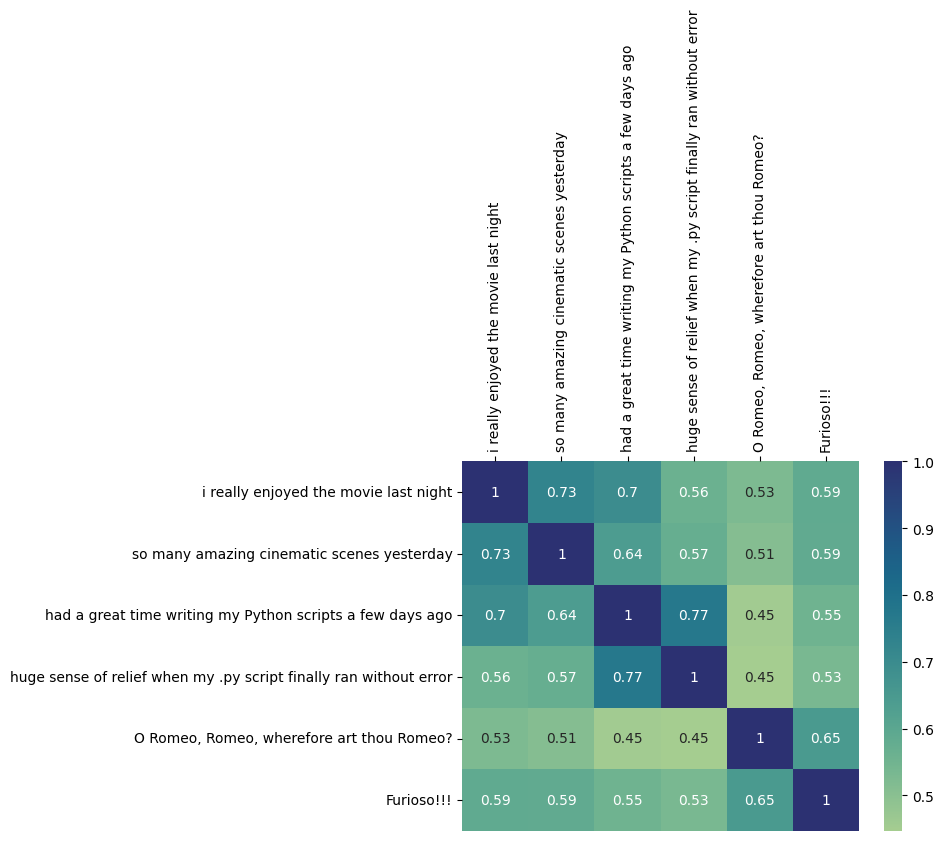

In [30]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## Code generation with code-bison


The code generation model (Codey) from PaLM API that you will use in this notebook is code-bison. It is fine-tuned to follow natural language instructions to generate required code and is suitable for a variety of coding tasks, such as:

- writing functions
- writing classes
- web-pages
- unit tests
- docstrings
- code translations, and many more use-cases.

Currently it supports the following languages:
- C++
- C#
- Go
- GoogleSQL
- Java
- JavaScript
- Kotlin
- PHP
- Python
- Ruby
- Rust
- Scala
- Swift
- TypeScript

You can find our more details [here](https://cloud.google.com/vertex-ai/docs/generative-ai/code/code-models-overview).

### Load model

In [31]:
code_generation_model = CodeGenerationModel.from_pretrained("code-bison")

### Model parameters for `code-bison`

You can customize how the PaLM API code generation behaves in response to your prompt by using the following parameters for `code-bison`:

 - `prefix`: it represents the beginning of a piece of meaningful programming code or a natural language prompt that describes code to be generated.
 - `temperature`: higher means more "creative" code responses. range: (0.0 - 1.0, default 0).
 - `max_output_tokens`: sets the max number of tokens in the output. range: (1 - 2048, default 2048)


### Hello Codey

In [32]:
prefix = "write a python function to do binary search"

response = code_generation_model.predict(prefix=prefix)

print(response.text)

```python
def binary_search(arr, target):
  """
  Performs a binary search on a sorted array.

  Parameters:
    arr: The sorted array to search.
    target: The value to search for.

  Returns:
    The index of the target value in the array, or -1 if the value is not found.
  """

  low = 0
  high = len(arr) - 1

  while low <= high:
    mid = (low + high) // 2
    guess = arr[mid]

    if guess == target:
      return mid
    elif guess < target:
      low = mid + 1
    else:
      high = mid - 1

  return -1
```


### Try out your own prompt

Some examples:
* write Go program to extract ip addresses from the text file
* write Java program that can extract pin codes from addresses
* write a standard SQL function that strips all non-alphabet characters from the string and encodes it to utf-8

In [33]:
prefix = """write a javascript function named as "calculate_cosine_similarity" and three unit \
            tests where it takes two arguments "vector1" and "vector2". \
            It then uses numpy dot function to calculate the dot product of the two vectors. \n
          """

response = code_generation_model.predict(prefix=prefix, max_output_tokens=1024)

print(response.text)

```javascript
/*
  Calculates the cosine similarity between two vectors.
  The cosine similarity is a measure of how similar two vectors are.
  It is calculated by taking the dot product of the two vectors and dividing it by the product of their magnitudes.
  The result is a number between -1 and 1, where -1 indicates perfect dissimilarity and 1 indicates perfect similarity.
*/
const calculate_cosine_similarity = (vector1, vector2) => {
  // Calculate the dot product of the two vectors.
  const dotProduct = vector1.reduce((acc, curr, i) => acc + curr * vector2[i], 0);

  // Calculate the magnitudes of the two vectors.
  const magnitude1 = Math.sqrt(vector1.reduce((acc, curr) => acc + curr ** 2, 0));
  const magnitude2 = Math.sqrt(vector2.reduce((acc, curr) => acc + curr ** 2, 0));

  // Calculate the cosine similarity.
  const cosineSimilarity = dotProduct / (magnitude1 * magnitude2);

  // Return the cosine similarity.
  return cosineSimilarity;
};

// Unit tests
const test1 = calcula

### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings. This way you can structure the prompts as per the expected functionality of the code.

In [34]:
language = "Unity C# function"
file_format = "json"
extract_info = "names"
requirements = """
              - the name should be start with capital letters.
              - There should be no duplicate names in the final list.
              """

prefix = f"""Create a {language} to parse {file_format} and extract {extract_info} with the following requirements: {requirements}.
              """

response = code_generation_model.predict(prefix=prefix, max_output_tokens=1024)

print(response.text)

```c#
using System;
using System.Collections.Generic;
using UnityEngine;
using Newtonsoft.Json;

public class JsonParser
{
    public List<string> ParseNames(string json)
    {
        // Parse the JSON string into a dictionary
        Dictionary<string, object> data = JsonConvert.DeserializeObject<Dictionary<string, object>>(json);

        // Create a list to store the names
        List<string> names = new List<string>();

        // Iterate through the dictionary and extract the names
        foreach (KeyValuePair<string, object> pair in data)
        {
            // Check if the value is a string
            if (pair.Value is string)
            {
                // Check if the string starts with a capital letter
                if (char.IsUpper(pair.Value[0]))
                {
                    // Add the name to the list
                    names.Add(pair.Value);
                }
            }
        }

        // Remove any duplicate names from the list
        names = n

## Code completion with `code-gecko`

Code completion uses the code-gecko foundation model to generate and complete code based on code being written. `code-gecko` completes code that was recently typed by a user.

To learn more about creating prompts for code completion, see [Create prompts for code completion.](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/code-completion#:~:text=code%20completion%2C%20see-,Create%20prompts%20for%20code%20completion,-.)

Code completion API has few more parameters than code generation.

* prefix: *required* : For code models, prefix represents the beginning of a piece of meaningful programming code or a natural language prompt that describes code to be generated.

* suffix: *optional* : For code completion, suffix represents the end of a piece of meaningful programming code. The model attempts to fill in the code in between the prefix and suffix.

* temperature:  *required* : Temperature controls the degree of randomness in token selection. Same as for other models. range: (0.0 - 1.0, default 0)

* maxOutputTokens: *required* : Maximum number of tokens that can be generated in the response. **range: (1 - 64, default 64)**

* stopSequences: *optional*  : Specifies a list of strings that tells the model to stop generating text if one of the strings is encountered in the response. The strings are case-sensitive.

In [35]:
code_completion_model = CodeGenerationModel.from_pretrained("code-gecko")

In [36]:
prefix = """
          def find_x_in_string(string_s, x):
         """

response = code_completion_model.predict(prefix=prefix, max_output_tokens=64)

print(response.text)

     for i in range(len(string_s)):
                  if string_s[i] == x:
                      return i


In [37]:
prefix = """
         def reverse_string(s):
            return s[::-1]
         def test_empty_input_string()
         """

response = code_completion_model.predict(prefix=prefix, max_output_tokens=64)

print(response.text)

assert reverse_string("") == ""


## Code chat with `codechat-bison`

The `codechat-bison` model lets you have a freeform conversation across multiple turns from a code context. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application for code generation, use the `codechat-bison` model because it has been fine-tuned for multi-turn conversation use cases.

In [38]:
code_chat_model = CodeChatModel.from_pretrained("codechat-bison")

code_chat = code_chat_model.start_chat()

print(
    code_chat.send_message(
        "Please help write a function to calculate the min of two numbers",
    )
)

MultiCandidateTextGenerationResponse(text=' ```python\ndef min_of_two_numbers(a, b):\n  """Returns the minimum of two numbers.\n\n  Args:\n    a: The first number.\n    b: The second number.\n\n  Returns:\n    The minimum of the two numbers.\n  """\n\n  if a < b:\n    return a\n  else:\n    return b\n```', _prediction_response=Prediction(predictions=[{'candidates': [{'content': ' ```python\ndef min_of_two_numbers(a, b):\n  """Returns the minimum of two numbers.\n\n  Args:\n    a: The first number.\n    b: The second number.\n\n  Returns:\n    The minimum of the two numbers.\n  """\n\n  if a < b:\n    return a\n  else:\n    return b\n```', 'author': '1'}], 'groundingMetadata': [{}], 'citationMetadata': [{'citations': []}], 'safetyAttributes': [{'blocked': False, 'scores': [], 'categories': []}]}], deployed_model_id='', metadata={'tokenMetadata': {'outputTokenCount': {'totalTokens': 83.0, 'totalBillableCharacters': 174.0}, 'inputTokenCount': {'totalBillableCharacters': 53.0, 'totalTokens

As shown below, the model should respond based on what was previously asked in the conversation:

In [39]:
print(
    code_chat.send_message(
        "can you explain the code line by line in bullets?",
    )
)

MultiCandidateTextGenerationResponse(text=' - The function `min_of_two_numbers` takes two arguments, `a` and `b`, which are the two numbers to be compared.\n- It first checks if `a` is less than `b`. If it is, then `a` is the minimum of the two numbers and the function returns `a`.\n- If `a` is not less than `b`, then `b` must be the minimum of the two numbers and the function returns `b`.', _prediction_response=Prediction(predictions=[{'candidates': [{'content': ' - The function `min_of_two_numbers` takes two arguments, `a` and `b`, which are the two numbers to be compared.\n- It first checks if `a` is less than `b`. If it is, then `a` is the minimum of the two numbers and the function returns `a`.\n- If `a` is not less than `b`, then `b` must be the minimum of the two numbers and the function returns `b`.', 'author': 'bot'}], 'groundingMetadata': [{}], 'citationMetadata': [{'citations': []}], 'safetyAttributes': [{'blocked': False, 'scores': [], 'categories': []}]}], deployed_model_i

You can take another example and ask the model to give more general code suggestion for a specific problem that you are working on.

In [40]:
code_chat = code_chat_model.start_chat()

print(
    code_chat.send_message(
        "what is the most scalable way to traverse a list in python?",
    )
)

MultiCandidateTextGenerationResponse(text=' The most scalable way to traverse a list in Python is to use a generator expression. Generator expressions are more memory-efficient than list comprehensions, and they can be used to create an iterator that can be used to traverse the list without having to store the entire list in memory.\n\nFor example, the following code uses a generator expression to traverse a list of numbers and print each number:\n\n```python\nnumbers = [1, 2, 3, 4, 5]\n\nfor number in (number for number in numbers):\n    print(number)\n```\n\nThis code will print the numbers 1, 2, 3, 4, and 5.\n\nGenerator expressions can also be used to filter or transform the elements of a list. For example, the following code uses a generator expression to filter the numbers in a list to only include the even numbers:\n\n```python\nnumbers = [1, 2, 3, 4, 5]\n\neven_numbers = (number for number in numbers if number % 2 == 0)\n\nfor number in even_numbers:\n    print(number)\n```\n\n

You can continue to ask follow-up questions to the original query.

In [41]:
print(
    code_chat.send_message(
        "how would i measure the iteration per second for the following code?",
    )
)

MultiCandidateTextGenerationResponse(text=' To measure the iterations per second for the given code, you can use the `timeit` module in Python. Here\'s an example of how you can do it:\n\n```python\nimport timeit\n\ndef my_function():\n    # Your code here\n\n# Measure the execution time of the function for 1000 iterations\ntime_taken = timeit.timeit(\'my_function()\', number=1000)\n\n# Calculate the iterations per second\niterations_per_second = 1000 / time_taken\n\nprint(f"Iterations per second: {iterations_per_second}")\n```\n\nThis code will execute the `my_function()` function 1000 times and measure the total execution time. It then calculates the iterations per second by dividing 1000 by the execution time.\n\nYou can replace `my_function()` with the code you want to measure the iterations per second for.', _prediction_response=Prediction(predictions=[{'candidates': [{'content': ' To measure the iterations per second for the given code, you can use the `timeit` module in Python. 